# PSI Files

### Read in PSI Files

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm

/Users/dejiatang/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
wt = pd.read_csv('Output-WT-01-17-10-21/wildtype_101_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(wt.head())
print(np.shape(wt))

           x         y          z          a         r          t
1 -57.142525  1.043483 -12.023183  42.758357  3.100708  25.529734
2 -57.287431  1.160608 -11.717759  42.983255  3.095804  25.355698
3 -55.520142  2.572127  -8.403139  43.301426  3.026213  22.342203
4 -55.512742  2.632191  -8.255026  43.363142  3.022943  22.236719
5 -55.353034  2.635195  -8.264224  43.254083  3.022529  22.185093
(717459, 6)


In [4]:
yot = pd.read_csv('Output-yot-01-17-10-24/you-too_01_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(yot.head())
print(np.shape(yot))

           x          y          z          a         r          t
1  -7.167169 -15.922585  15.323356   9.315287 -0.826894  21.638900
2  -6.687169 -15.462393  15.072909   8.659478 -0.817742  21.192862
3  -6.527169 -15.462393  15.072909   8.455678 -0.816820  21.211209
4  16.192831  -2.445724  -1.356699 -15.570151 -2.490046   4.033074
5  -6.527169 -15.296493  15.201662   8.477253 -0.807122  21.177483
(21478, 6)


### Comparing Two Samples

In [5]:
np.array(yot.x)

array([ -7.16716889,  -6.68716889,  -6.52716889, ..., -35.64716889,
         7.55283111,   7.71283111])

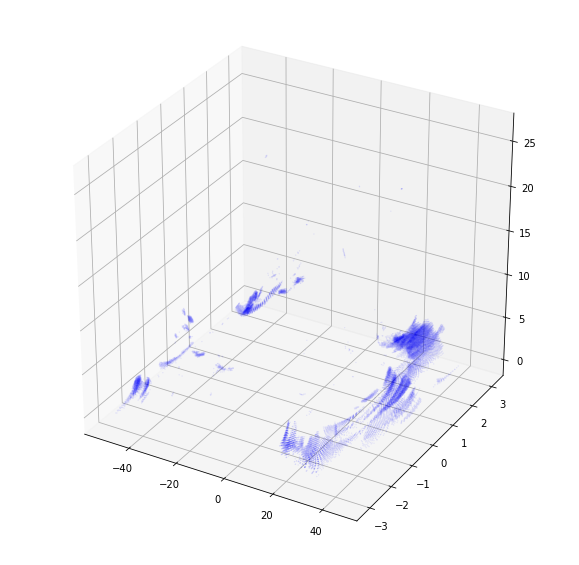

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(np.array(yot.a), np.array(yot.r), np.array(yot.t), label='curve in (x,y)', alpha=0.1, s=0.1, c='blue')

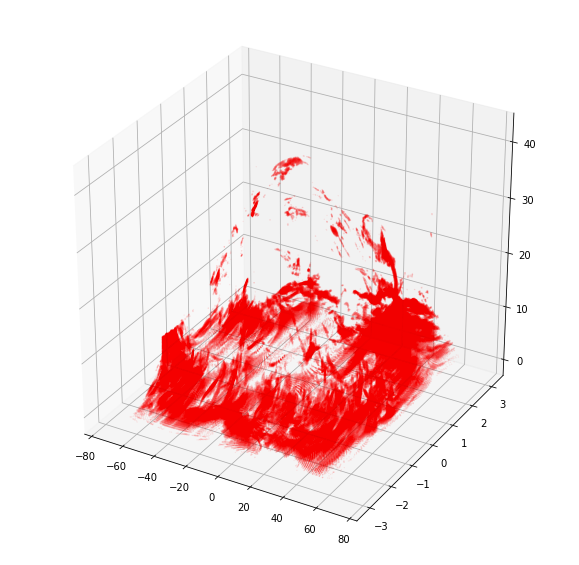

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(np.array(wt.a), np.array(wt.r), np.array(wt.t), label='curve in (x,y)', alpha=0.1, s=0.1, c='red')

In [9]:
yot2 = pd.read_csv('Output-yot-01-17-10-24/you-too_02_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(yot2.head())
print(np.shape(yot2))

           x         y         z          a         r         t
1 -14.771436 -4.136140 -6.381171  13.278325 -2.650418  8.769296
2 -16.051436 -5.050683 -4.877439  14.696485 -2.483093  8.253678
3 -16.051436 -5.133823 -4.740736  14.724071 -2.465332  8.202552
4 -16.211436 -5.216963 -4.604033  14.894493 -2.449843  8.178526
5 -16.211436 -5.300104 -4.467330  14.922516 -2.431738  8.132445
(40328, 6)


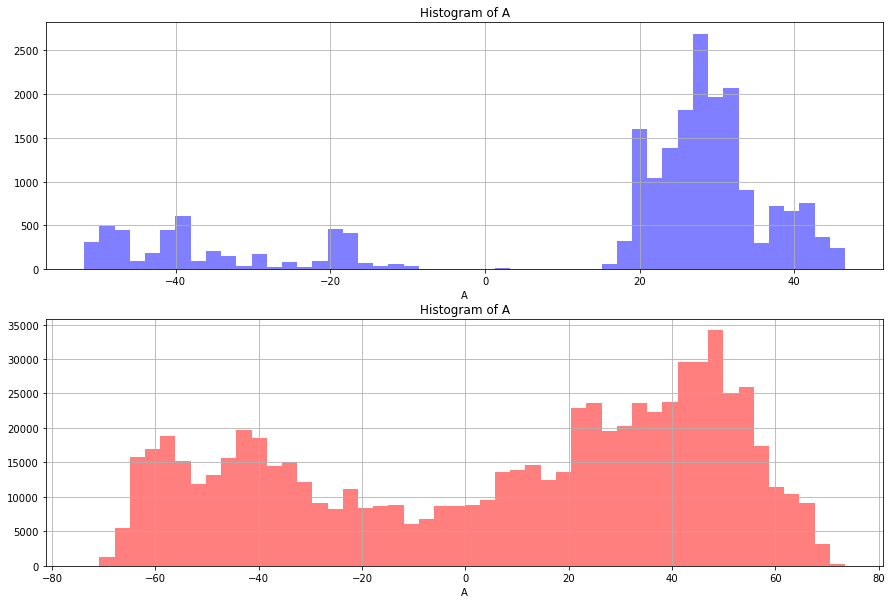

In [30]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.a, 50, facecolor='b', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.a, 50, facecolor='r', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)
plt.show()

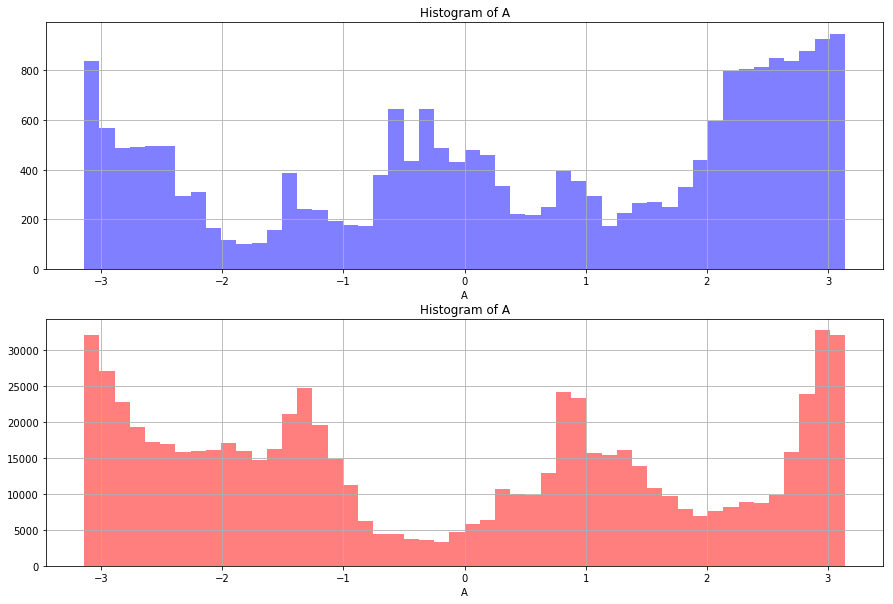

In [31]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.r, 50, facecolor='b', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.r, 50, facecolor='r', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)
plt.show()

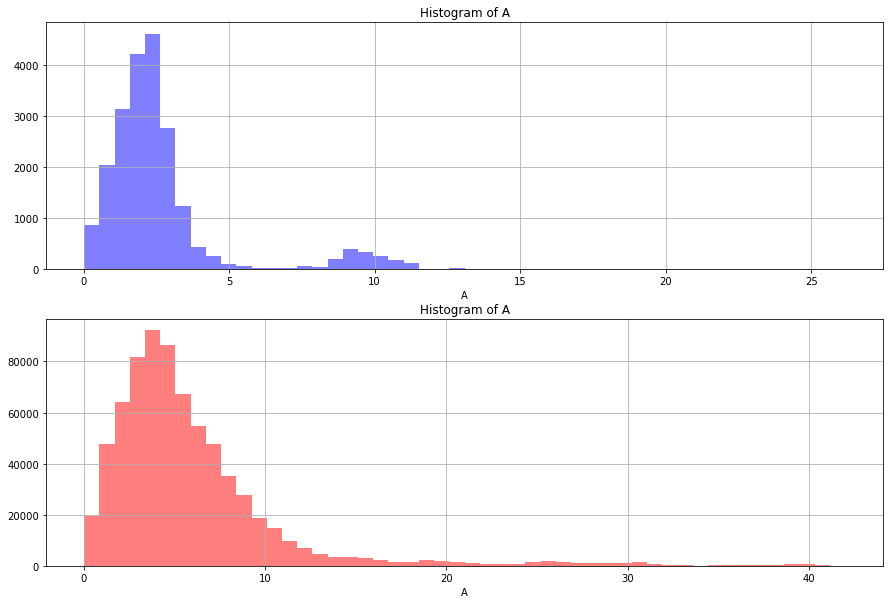

In [32]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.t, 50, facecolor='b', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.t, 50, facecolor='r', alpha=0.5)
plt.xlabel('A')
plt.title('Histogram of A')
plt.grid(True)
plt.show()